# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** This is a classification problem. You are labeling each student with pass or fail based on their test results, absences, health, etc. features. 

You could treat this as a regression if you were trying to fit a continuous function representing the probability that someone would fail to graduate with input variables of test results, absences, health, etc. However, in the training set you only have labels of pass or fail, 0 or 1, with no values in between (non-continuous input). The discontinuous nature of the ouptputs would make regression difficult.  

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [2]:
# TODO: Calculate number of students
n_students = len(student_data)

# TODO: Calculate number of features
# number of features is the number of keys - 1 (passed is not a feature, it's the class)
n_features = len(student_data.keys()) - 1

# TODO: Calculate passing students
n_passed = sum(student_data['passed'] == 'yes')

# TODO: Calculate failing students
n_failed = sum(student_data['passed'] == 'no')

# TODO: Calculate graduation rate
grad_rate = 100.*n_passed / n_students

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [3]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

['age', 'Medu', 'Fedu']
age   Medu


<IPython.core.display.Javascript object>


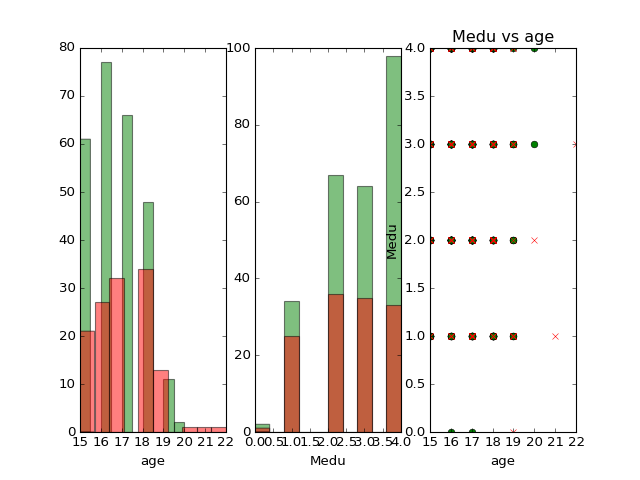

age   Fedu


<IPython.core.display.Javascript object>


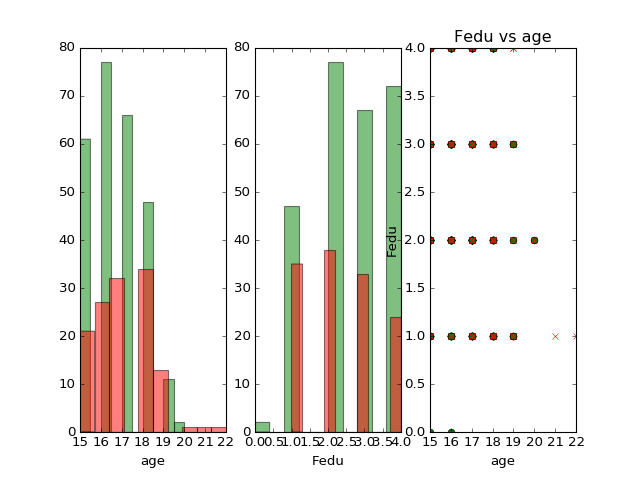

Medu   Fedu


<IPython.core.display.Javascript object>


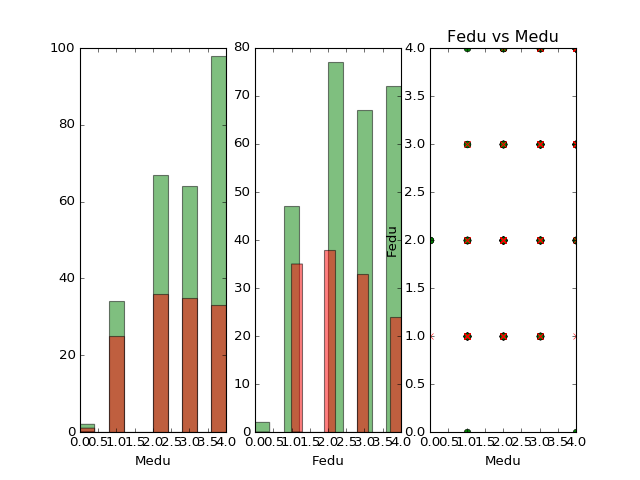

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt

#for label in X_all:
#    plt.figure()
#    plt.hist(X_all[label][y_all == 'yes'], color='g', label='Passed', normed=True)
#    plt.hist(X_all[label][y_all == 'no'], color='r', alpha=0.5, label='Failed', normed=True)
#    plt.xlabel(label)
#    plt.legend()
#plt.show()

ipass = y_all == 'yes'
ifail = y_all == 'no'
#keys = ['age', 'Medu', 'Fedu', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'internet', 'freetime']
keys = ['age', 'Medu', 'Fedu']
print keys
for k1 in keys:
    i = keys.index(k1)
    for k2 in keys[i+1:]:
        print k1, ' ', k2
        plt.figure()
        x1 = np.array(X_all[k1][ipass])
        y1 = np.array(X_all[k2][ipass])
        x2 = np.array(X_all[k1][ifail])
        y2 = np.array(X_all[k2][ifail])
        plt.subplot(1,3,1)
        plt.hist(x1, color='green', alpha=0.5)
        plt.hist(x2, color='red', alpha=0.5)
        plt.xlabel(k1)
        plt.subplot(1,3,2)
        plt.hist(y1, color='green', alpha=0.5)
        plt.hist(y2, color='red', alpha=0.5)
        plt.xlabel(k2)
        plt.subplot(1,3,3)
        plt.plot(x1, y1, 'go', label='Pass')
        plt.plot(x2, y2, 'rx', label='Fail')
        plt.xlabel(k1)
        plt.ylabel(k2)
        plt.title(k2 + ' vs ' + k1)
#        scatter_hist2_2d(x1, y1, x2, y2)
#        plt.plot(X_all[k1][ipass], X_all[k2][ipass], 'go', label='Pass')
#        plt.plot(X_all[k1][ifail], X_all[k2][ifail], 'rx', label='Fail')
#        plt.xlabel(k1)
#        plt.ylabel(k2)
#        plt.legend()
plt.show()


### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [5]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [6]:
# TODO: Import any additional functionality you may need here
from sklearn.cross_validation import train_test_split

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test , y_train, y_test = train_test_split(X_all, y_all, train_size = num_train, random_state = 42)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?

- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: **
I have chosen AdaBoost, K nearest neighbors and Support Vector Classifier.

Looking at plots of the data (Figure 1-3), there is not a simple boundary separating the students who graduate vs those who fail. Therefore, classifiers that are able to handle complex decision boundaries may perform best. Looking at the size of the raw data that we are classifying, there are 265 students who passed and 130 who failed. The model we are using has almost 50 features. This means that the data we are training with is going to be very sparsely populating this space. Either more training data should be collected, or the number of features should be reduced.

In industry, AdaBoost has been used in predicting energy consumption in the steel industry (Proceedings of the Sixth International Conference on Management Science and Engineering Management Volume 185 of the series Lecture Notes in Electrical Engineering pp 411-419) The authors are trying to predict the energy consumption in the steel industry. Because energy consumption in the steel industry is tied to current global demand for steel but also government incentives for steel production, traditional modeling methods fail. The authors use a neural network based Ada Boost algorithm.

The strength of the AdaBoost classifier is that it is one of the best "out of the box" classifiers, and tends to be less susceptible to over fitting. It is also computationally efficient. A disadvantage of AdaBoost is that it can be susceptible to outliers. The algorithm can spend too much time trying to fit a data point that is really just noise. 

AdaBoost is a good candidate for this problem due to its versatility and computational efficiency.

K nearest neighbors has been used in fault detection in industrial plants (do Prado Arruda, Fellipe, et al. "Fault Detection in Industrial Plant Using [Kappa]-Nearest Neighbors with Random Subspace Method." Proceedings on the International Conference on Artificial Intelligence (ICAI). The Steering Committee of The World Congress in Computer Science, Computer Engineering and Applied Computing (WorldComp), 2014.) 

The strength of the K nearest neighbor is that the training time is effecient. The algorithm simply needs to store all of the training data. The algorithm can also learn arbitrarily complex classification boundaries. However, a weakness is the classification time is costly because the algorithm needs to find the k nearest neighbors by sifting through the data. Also, because all of the training data needs to be stored, the memory requirements increase as the size of the learning set increaes.  

K nearest neighbors is a good candidate for this problem because of its ability to handle arbitrarily complex classification boundaries.

Support vector classifiers have been used in analysing the solvency of companies by banks / lenders ( Laura Auria
 and Rouslan A. Moro, 'Support Vector Machines (SVM) as a Technique for Solvency Analysis'. Deutsches Institut für Wirtschaftsforschung, Berlin 2008) Balance sheet data from the companies is used as features and the classifier is used to predict the insolvency of a business within 3 years.
 
The strength of the support vector classifier lies in its ability to use kernels to create non-linear boundaries between classes.

Naive Bayes classifier has been used in text classification (Andrew McCallum and Kamal Nigam. A Comparison of Event Models for Naive Bayes Text Classification. AAAI-98 Workshop on "Learning for Text Categorization".) Here, an algorithm is trying to classify a document based on an analysis of the text. For example, it may classify a document as being about tennis, physics, sports, etc. The naive bayes classifier is trained using a dictionary of words found to be highly discriminative of these categories.

The strength of the Naive Bayes classifier is that it can is very fast to learn and classify data. It has also been shown to work on a variety of machine learning problems. The speed at which it can learn and classify data comes from the assumption that probabilities are conditionally independent within the model. This is both a strength and weakness. For classification problems where things are conditionally dependent, the Naive Bayes algorithm will fail to correctly classify items. For example, a Naive Bayes classifier cannot learn XOR(x1, x2).

Naive Bayes is a good candidate for this problem due to its computational efficiency. The board of directors has asked to find the most effective algorithm that uses the fewest computational resources. 



### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [7]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [8]:
# TODO: Import the three supervised learning models from sklearn
# from sklearn import model_A
from sklearn.ensemble import AdaBoostClassifier
# from sklearn import model_B
from sklearn.neighbors import KNeighborsClassifier
# from skearln import model_C
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


# TODO: Initialize the three models
clf_A = AdaBoostClassifier(random_state=42)
clf_B = KNeighborsClassifier()
clf_C = SVC(random_state=42)
clf_D = GaussianNB()

# TODO: Set up the training set sizes
X_train_100 = X_train[:][:100]
y_train_100 = y_train[:][:100]

X_train_200 = X_train[:][:200]
y_train_200 = y_train[:][:200]

X_train_300 = X_train[:][:300]
y_train_300 = y_train[:][:300]

# TODO: Execute the 'train_predict' function for each classifier and each training set size
# train_predict(clf, X_train, y_train, X_test, y_test)
print 'Classifier A:===='
train_predict(clf_A, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_A, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_A, X_train_300, y_train_300, X_test, y_test)

print '\nClassifier B:===='
train_predict(clf_B, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_B, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_B, X_train_300, y_train_300, X_test, y_test)

print '\nClassifier C:===='
train_predict(clf_C, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_C, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_C, X_train_300, y_train_300, X_test, y_test)

print '\nClassifier D:===='
train_predict(clf_D, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_D, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_D, X_train_300, y_train_300, X_test, y_test)



Classifier A:====
Training a AdaBoostClassifier using a training set size of 100. . .
Trained model in 0.0906 seconds
Made predictions in 0.0054 seconds.
F1 score for training set: 0.9481.
Made predictions in 0.0055 seconds.
F1 score for test set: 0.7669.
Training a AdaBoostClassifier using a training set size of 200. . .
Trained model in 0.0945 seconds
Made predictions in 0.0073 seconds.
F1 score for training set: 0.8927.
Made predictions in 0.0080 seconds.
F1 score for test set: 0.8281.
Training a AdaBoostClassifier using a training set size of 300. . .
Trained model in 0.1035 seconds
Made predictions in 0.0072 seconds.
F1 score for training set: 0.8637.
Made predictions in 0.0054 seconds.
F1 score for test set: 0.7820.

Classifier B:====
Training a KNeighborsClassifier using a training set size of 100. . .
Trained model in 0.0006 seconds
Made predictions in 0.0012 seconds.
F1 score for training set: 0.8060.
Made predictions in 0.0012 seconds.
F1 score for test set: 0.7246.
Training 

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.


** Classifer 1 - Ada Boost**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |       0.1609             |      0.0054            |        0.948     |     0.767      |
| 200               |       0.1141             |      0.0055            |        0.893    |     0.828      |
| 300               |       0.1045             |      0.0054            |        0.864    |     0.782      |

** Classifer 2 - K Nearest Neighbors**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |   0.0005                |    0.0011              |      0.806       | 0.725           |     
| 200               |   0.0006                |    0.0028              |      0.8800      | 0.769           |
| 300               |   0.0007                |    0.0023              |      0.8809      | 0.780           |


** Classifer 3 - Support Vector Classifier **  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |    0.0014               |  0.0008                |  0.878           |  0.775          |
| 200               |    0.0035               |  0.0025                |  0.868           |  0.782          |
| 300               |    0.0075               |  0.0018                |  0.876           |  0.784          |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: ** I have chosen the Support Vector Classifier algorithm as the best model. All classifiers have an F1 score on the test data set of 0.78 with the training set of 300, so all have similar prediction capabilities. However, the support vector classifier is very slightly better. Also, the prediction times for K nearest neighbors and support vector classifier are both 0.002s for the training set size = 300. The prediction time for AdaBoost is higher, 0.0054s. There is not much efficiency lost in choosing the support vector classifier. Overall, the F1 scores are all similar, but the suport vector classifier wins very slightly. 

I also wanted to try a very efficient classifier, so I included the gaussian naive bayes. Its F1 score is not quite as good (0.76 on the 300 training set), however its prediction time is much better (0.0003s vs 0.002s.) This gain in efficiency makes it a classifier to seriously consider if computational efficiency is a priority. The naive bayes algorithm will use 4% of the computational resources of the support vector classifier. Unfortunately, there are no parameters to tune to increase performance.

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: ** The support vector classifier is used to distinguish between two classes, in our case students who end up graduating or failing. The support vector classifier does this by finding a (in 2 dimensions) "line" that separates the two classes. 

![title](img/optimal-hyperplane.png)(image from http://docs.opencv.org/2.4/doc/tutorials/ml/introduction_to_svm/introduction_to_svm.html)

In more than 2 dimensions, the support vector classifier finds a plane that separates the two classes. When finding the plane separating the two classes, it does so in such a way that it maximizes the distance between the line and the points in the 2 classes. The area between the two classes is called the margin and it is this that is maximized. In maximizing the margin, the support vector algorithm weights the contribution of points according to their importance. Points that lie along the margin boundaries are weighted highly. Those points that lie far from the margin have no influence on the calculation. The points that lie along the margin boundary are called the support vectors (solid shapes in the picture.)

In cases where the data cannot be separated by a line or plane, the support vector classifier can take advantage of "kernels." This allows the support vector classifier to create complex boundaries around the data. The kernel trick involves adding an extra dimension to the data. For example, figure 4 shows some 2 dimensional that has red and blue points that could be separated by a circular boundary. However, if we add a third dimesion, z, which is the distance of each point from the origin, suddenly you can imagine separating these two clusters by a plane (figure 5). 

<IPython.core.display.Javascript object>


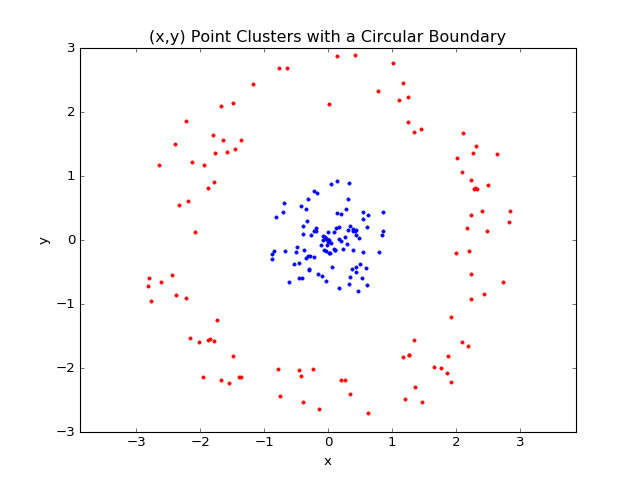

<IPython.core.display.Javascript object>


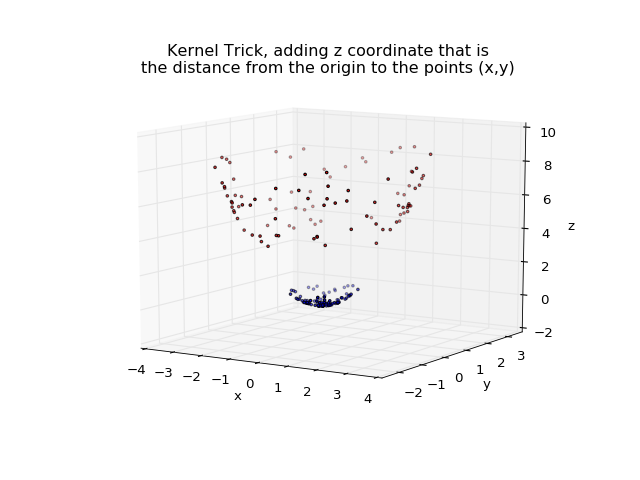

In [9]:
from mpl_toolkits.mplot3d import Axes3D
def show_kernel_trick_figure():
    num_points = 100
    r = np.random.rand(num_points,1)
    theta = np.random.rand(num_points,1)*2.*np.pi
    x1 = r*np.cos(theta)
    y1 = r*np.sin(theta)
    z1 = x1**2 + y1**2
    x2 = (r+2)*np.cos(theta)
    y2 = (r+2)*np.sin(theta)
    z2 = x2**2 + y2**2
    plt.figure()
    plt.plot(x1,y1,'b.', x2, y2, 'r.')
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('(x,y) Point Clusters with a Circular Boundary')

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, y1, z1, c='b', marker='.')
    ax.scatter(x2, y2, z2, c='r', marker='.')
    ax.view_init(11,-58)
    ax.axis('equal')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.title('Kernel Trick, adding z coordinate that is\nthe distance from the origin to the points (x,y)')
    
    plt.show()
show_kernel_trick_figure()

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [10]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn import grid_search
from sklearn.metrics import make_scorer

# TODO: Create the parameters list you wish to tune
parameters = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'algorithm':['SAMME', 'SAMME.R']}

# TODO: Initialize the classifier
clf = AdaBoostClassifier(random_state=42)

# TODO: Create the parameters list you wish to tune
parameters = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'weights':['uniform', 'distance'], 'p':[1, 2]}

# TODO: Initialize the classifier
clf = KNeighborsClassifier()

# TODO: Create the parameters list you wish to tune
parameters = {'degree' : [1, 2, 3, 4, 5], 'kernel': ['poly', 'rbf'], 'gamma' : np.arange(0,1,0.1)}
# TODO: Initialize the classifier
clf = SVC()

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label='yes')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = grid_search.GridSearchCV(clf, parameters, f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

Made predictions in 0.0032 seconds.
Tuned model has a training F1 score of 0.8289.
Made predictions in 0.0012 seconds.
Tuned model has a testing F1 score of 0.7945.


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: ** The final F1 score for the support vector classifier, after tuning, is 0.795 for the test set. This compares to 0.784 using the default parameters. The additional grid search parameter tuning did not increase the performance by very much. Also, the resulting F1 score for the SVC is not that much greater than the F1 score the Naive Bayes classifier (0.76). Therefore, in the end the Naive Bayes classifier is probably the best choice due to its high computational efficiency. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.